# ============================

# **Week 6**

## Machine Learning: Clustering and Classificaion 




# ============================

In traditional programming we mainly deal with an input and we need to explicitly write program for machine to produce a desired output but in the machine learning way of programming you will give the input and output (usually a smaller set of desired outputs) and the machine will find the right program to model output.  <br>


Maching learning algorithm can be classified in two groups based on the available data:
* **Supervised learning:** In this set of algorithm we are dealing with a labeled dataset and we are trying to predict the label for future instances. Here we are trying to find the **conditional** probability for our variables given a set of known examples.  
* **Unsupervised learning:** In these methods of learning we usually have a data set without any label and we are trying to find an underlying patterns. In the language of probability, we are trying to find the probability density of the inputs. We want to come up with a **priori** probability distribution.

We are going to see that the **Supervised learning** is basically an **optimization** problem. 

In [7]:
import numpy as np 
import random 
import matplotlib.pyplot as plt


# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# **Clustering:**



Clustering is an optimization problem. But first let's define some useful concepts:

## **Variability** of a cluster: $V(c)$  
This shows how much difference exist between each element of the cluster and the mean of the cluster. 

$$
\begin{equation*}
V(c) = \sum_{x \in c} d(mean(c), x)
\end{equation*}
$$

In which $c$ is a cluster, and $d(x_0,x_1)$ is the distance between them.  [Euclidean](https://en.wikipedia.org/wiki/Euclidean_distance) or even [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance) distance)


## **Dissimilirity** of the set of clusters: $D(C)$

This is a measure for a aggregate variablility of a set of clusters. And it is defined as:


$$
\begin{equation*}
D(C) = \sum_{c \in C} V(c)
\end{equation*}
$$

### Quick note on $d(x_0,x_1)$: 

Usually we define the distance between two points to be _Euclidean_. 

If we take two vectors as $X, Y \in \mathbb{R}^M$, we define the Euclidean distance to be:


$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \sqrt{\sum_{i=1}^M (X_i-Y_i)^2}
\end{equation*}
$$


This is a special case for a more general class of distance definitions which are called the _Minkowski_ distance, which is defined as: 

$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \sqrt[n]{\sum_{i=1}^M (X_i-Y_i)^n}
\end{equation*}
$$

Mathematically speaking, this is a definition of $L^p$ spaces (_Lebesgue_ spaces) which themselves are part of Banach spaces.

Another special cases from Minkowski are the [Taxicab](https://en.wikipedia.org/wiki/Taxicab_geometry) distance (also known as Manhatan distance): 

$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \sum_{i=1}^M \|X_i-Y_i\|
\end{equation*}
$$


And the [ Tchebychev](https://en.wikipedia.org/wiki/Chebyshev_distance) distance:


$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \lim_{n \to \infty}{\sqrt[n]{\sum_{i=1}^M (X_i-Y_i)^n}}
\end{equation*}
$$


As an excersice, find the equivalent representation of a circle in 2-d Euclidian geometry, for different cases of n. 

In [8]:
def Minkowski_d(x1, x2, p = 2):
    """ Function from L^p
    This is a function for defining a general distance measure between any 
    given N-dimensional vectors:     x1, x2
    
    INPUT:
    ------
           x1 (list or array of floats) : First vector
           x2 (list or array of floats) : Second vector
           p (float) : The power in our Minkowski definition 
    
    OUTPUT:
    -------
            (float) : The Minkowski distance of power p
                      between x1 and x2 
    """
    _sum_ = 0
    for x1_, x2_ in zip(x1, x2):
        dummy = pow(abs(x1_ - x2_), p)
        _sum_+= dummy
        
    distance = pow(_sum_, 1/p)
    return distance

### Continuing on Variability of a cluster:

Now if you look at the definition of Variablity, you see that for the special case of Euclidean distance we are just missing a factor of $1/\sqrt{k}$ in which $k$ is the number of points in a given cluster, from the definition of [variance](https://en.wikipedia.org/wiki/Variance).


_What does it mean to not include the number of points in a cluster when calculating variability?_

By doing that we are assigning **higher variability** to the **larger** cluster than the smaller cluster of the **same variance**.



You may have guessed by now, that we are trying to come up with an objective function for our optimization problem. So we can ask for a set of clusters that would minimize the dissimilarity of the clusters.

But if we put a cluster on each point, we are going to get zero dissimilarity which obviously is not a useful answer. For avoiding this we need to define a constraint; for example, we can constrain the total distance between clusters to be smaller than some value, or enforce a maximum number for clusters.



# Hierarchical Clustering:

In this method of clustering we do the following:

_Naive algorithm:_

1. Assign a cluster to each point, so $N$ clusters for $N$ points.

2. Find the most similar clusters and merge them together. Now we have $N-1$ clusters.

3. We do the second part untill we get to a cluster that contains all of the $N$ points.


This is the [Agglomerative hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering#Agglomerative_clustering_example).
 

Now we need to quantify what we mean by similarity (linkage) of two clusters.


These are **Linkage Metrics**:

1. **Single-linkage**:  It is the shortest distance between any member of one cluster and any memeber of another.


2. **Complete Linkage**: It is the greatest distance between any member of one cluster and any memeber of another.


3. **Average Linkage**: It is the average distance between any member of one cluster and any memeber of another.

Let's look at the following example:

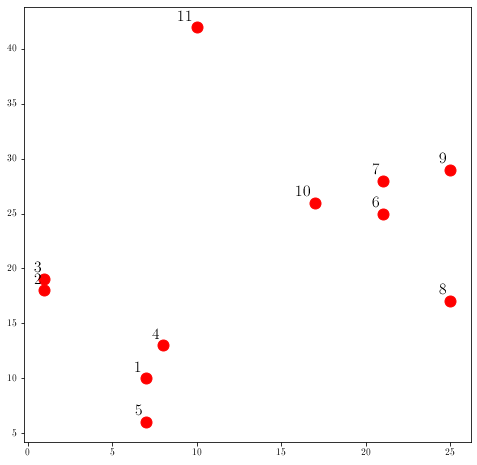

In [9]:
np.random.seed(500)

x1 = np.random.randint(0,10, 5)
x2 = np.random.randint(8,28, 6)

y1 = np.random.randint(0, 20, 5)
y2 = np.random.randint(15, 55, 6)



_x_, _y_ = list(x1), list(y1)

_x_.extend(list(x2))
_y_.extend(list(y2))
labels = np.arange(1, len(_x_)+1, 1)


plt.figure(figsize=(8,8))

plt.plot(x1, y1, "r." , markersize = 22)
plt.plot(x2, y2, "r.", markersize = 22)


for label, x, y in zip(labels, _x_, _y_):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom', fontsize=16)
plt.show()  

plt.show()

Now let's use `scipy` for creating the [dendogram](https://en.wikipedia.org/wiki/Dendrogram) for the hierarchical clustering:

In [10]:
import scipy.cluster.hierarchy

In [12]:
_data_ = np.c_[_x_, _y_]

In [14]:
links = scipy.cluster.hierarchy.linkage(_data_, method = "single", metric = "euclidean")

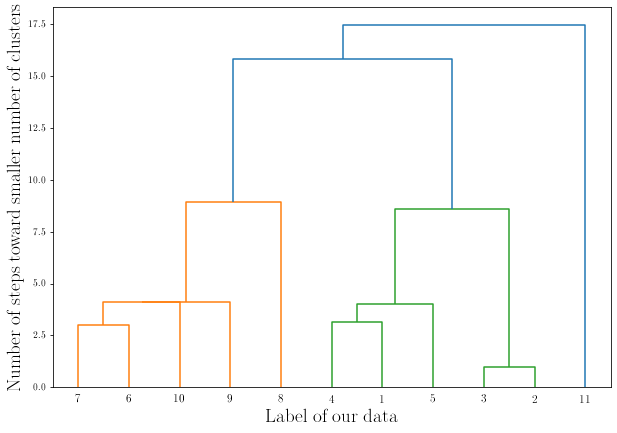

In [18]:
plt.figure(figsize = (10, 7))
scipy.cluster.hierarchy.dendrogram(links, orientation = 'top', 
                                 labels = labels, 
                                 distance_sort = 'descending',
                                 show_leaf_counts = True
                                 )

plt.xlabel(r"Label of our data", fontsize = 19)
plt.ylabel(r"Number of steps toward smaller number of clusters", fontsize = 19)
plt.show()

This is our resulting dendogram that contains all of the possible clusterings following the algorithm mentioned above.

### _few notes_:

This is completely deterministic for a given linkage metric.


The answer might not be optimal, since the hierarchical clustering is a **greedy algorithm**. In other words, your answer could be optimal but not globally optimal. 


However, this can become very slow and the number of calculations grows with $O(N^3)$ which can become useless quickly. 

_However for some linkage metrics (i.e. single-linkage), there exist $O(N^2)$ algorithms but still not very fast._

# k-means clustering:

If you know how many clusters you want then this is going to be a better choice since it is much faster. ($k$ is the number of clusters we want)

```algorithm
1. Start by randomly choosing k examples 
           as our intial centeroid. 

2. create k clusters by assiging examples 
           to closest cendroid.
           
3. Assign a new values for the centeroid: 
           The average of previous cluster configuration.
    
4. Go to (2) while centroids are changing, else break.
           We have our final configuration.
           
```  


**_Important:_** Notice that the algorithm is not deterministic and the result can change by choosing another initial configuration.

_How much time it takes to run the algorithm once before getting to the 4th line?_

For $N$ data points and $k$ clusters we need to find $kN$ distances. Which is much smaller than $O(N^2)$. Also, we will see that we do not need to go through many iteration to converge. (Relative to $N$)

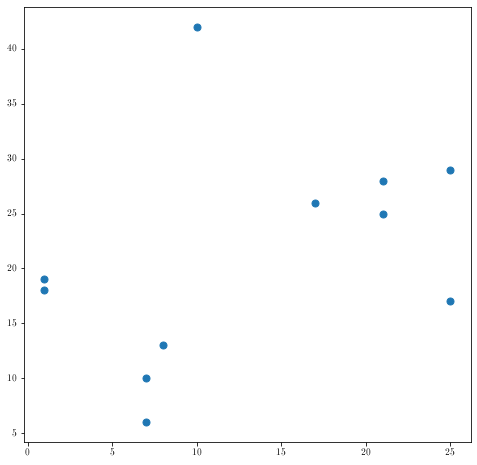

In [19]:
plt.figure(figsize=(8,8))

plt.plot(_x_, _y_, ".", markersize = 14)

plt.show()

These are some 2-d data points and you want to find a clustering for them.

## Let's define some classes!


First class is `Point` which contains information about a given data point:

In [37]:
class Point:
    def __init__(self, features, label = None, \
                 name = "Unassigned"):
        self.name = name
        self.features = features
        self.label = label
        
    # get the dimensionality of the features
    def get_dimension(self):
        return len(self.features)
    
    def get_features(self):
        return self.features
    
    def get_label(self):
        return self.label
    
    def get_name(self):
        return self.name
    
    def distance_Minkowski(self, other, p = 2):
        return Minkowski_d(self.features, other.get_features(), p)
    distance_Minkowski.__doc__ = Minkowski_d.__doc__
    
    def get_norm(self, p = 2):
        _zero_=[0 for _ in range(self.get_dimension())]
        return Minkowski_d(self.features, _zero_, p)
    
    def __str__(self):
        return self.name +" : "+ str(self.features) + ' : '\
               + str(self.label)

Our second class is the class of `Cluster`, which contains several data points. (`Point` objects)

In [41]:
class Cluster:
    def __init__(self, points):
        self.points = points
        self.centroid = self.find_centroid()
        
    def find_centroid(self):
        _sum_ = np.zeros(self.points[0].get_dimension())
        for point in self.points:
            _sum_+=np.array(point.get_features())
        Centroid_vec = _sum_/len(self.points)
        centroid = Point(Centroid_vec, name = "Centroid")
        return centroid
    
    def update(self, points):
        # Keep the old centroid
        previous_centroid = self.centroid
        # Update the Cluster attribiutes
        self.points = points
        self.centroid = self.find_centroid()
        return self.centroid.distance_Minkowski(previous_centroid)
    
    def variability(self, p = 2):
        _sum_distances_=0
        for point in self.points:
            _sum_distances_ += point.distance_Minkowski(self.centroid, p)
        return _sum_distances_
    
    
    def Elements(self):
        for point in self.points:
            yield point
            
    def __str__(self):
        names = []
        for point in self.points:
            names.append(point.get_name())
        names.sort()
        info = "Cluster Centroid: " \
               + str(self.centroid.features) +  "contains:" + "\n"
        for name in names:
            info = info + name + ", "
        return info[:-2] #remove trailing comma and space           

In [42]:
def Dissimilarity(_clusters_, p = 2):
    _tot_vari = 0
    for _cluster_ in _clusters_:
        _tot_vari += _cluster_.variability(p)
    return _tot_vari


### Driver's dataset:

Let's import a delivery fleet data set:

In [43]:
data = {}

with open("data_drivers.data", 'r') as f:
    lines = f.readlines()
    header = lines[0].split()
    
    for i, col in enumerate(header):
        x = []
        for line in lines[1:]:
            x.append(float(line.split()[i]))
            data[col] = x

In [26]:
data.keys()

dict_keys(['Driver_ID', 'Distance_Feature', 'Speeding_Feature'])

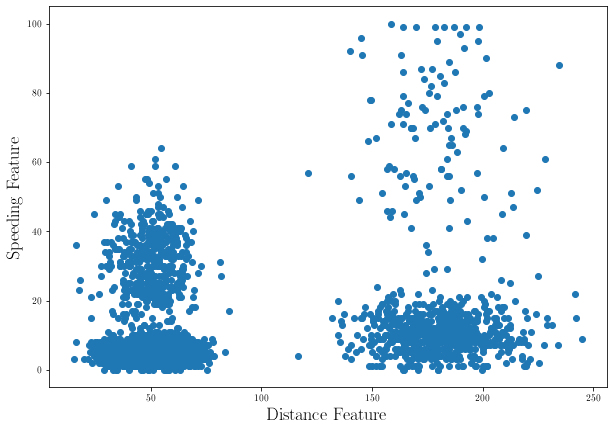

In [27]:
plt.figure(figsize=(10,7))

plt.scatter(data["Distance_Feature"], data["Speeding_Feature"])

plt.xlabel(r"Distance Feature", fontsize = 18)
plt.ylabel(r"Speeding Feature", fontsize = 18)

plt.show()

In [44]:
_points_ = []

for i in range(len(data["Driver_ID"])):
    features = [data["Distance_Feature"][i], data["Speeding_Feature"][i]]
    P = Point(features, name = data["Driver_ID"][i])
    _points_.append(P)

In [45]:
def K_Means_Clustering(points, k, verbose = False):
    # Get k random initial centroids, create cluster for each
    initial_centroids = random.sample(points, k)
    clusters = []
    for centroid in initial_centroids:
        clusters.append(Cluster([centroid]))
        
    #Iterate until centroids don't move
    converged = False
    number_iterations = 0
    while not converged:
        number_iterations += 1
        #Create a list containing k distinct empty lists
        new_clusters = []
        for i in range(k):
            new_clusters.append([])
            
        # Associate each example with closest centroid
        for p in points:
            # Find the closest centroid
            smallest_distance = p.distance_Minkowski(clusters[0].find_centroid())
            idi = 0
            for i in range(1, k):
                distance = p.distance_Minkowski(clusters[i].find_centroid())
                if distance < smallest_distance:
                    smallest_distance = distance
                    idi = i
            #Add p to the list of examples for appropriate cluster
            new_clusters[idi].append(p)
            
        for c in new_clusters: # Avoid having empty clusters
            if len(c) == 0:
                raise ValueError('Empty Cluster')
        
        # Update each cluster; check if a centroid has changed
        converged = True
        for i in range(k):
            if clusters[i].update(new_clusters[i]) > 0.0:
                converged = False
        if verbose:
            print('Iteration #' + str(number_iterations))
            for c in clusters:
                print(c)
            print('') #add blank line
    return clusters


In [46]:
clusters = K_Means_Clustering(_points_, 2)

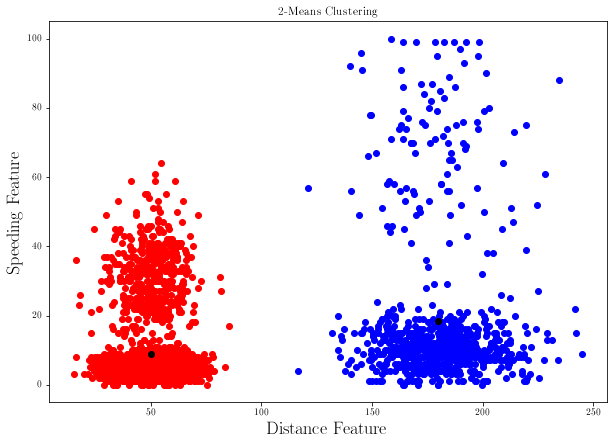

In [47]:
color = "b"

plt.figure(figsize=(10,7))

for cluster in clusters:
    for p in list(cluster.points):
        plt.scatter(p.get_features()[0], p.get_features()[1], color = color)
    color = "r"
    plt.scatter(cluster.find_centroid().get_features()[0], cluster.find_centroid().get_features()[1], color = "k")

plt.title(r"2-Means Clustering")

plt.xlabel(r"Distance Feature", fontsize = 18)
plt.ylabel(r"Speeding Feature", fontsize = 18)


plt.show()

In [48]:
clusters = K_Means_Clustering(_points_, 4)

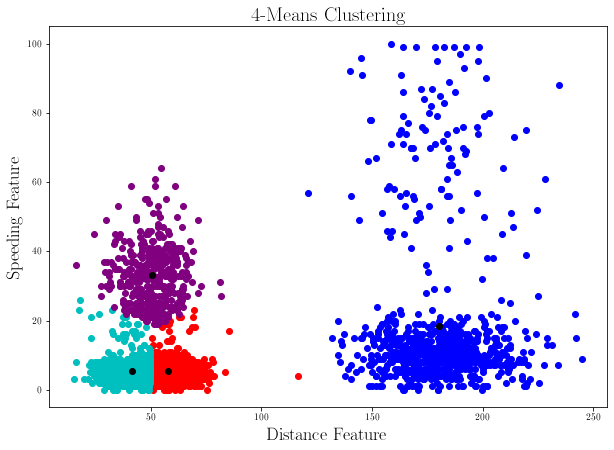

In [49]:
plt.figure(figsize=(10,7))


colors = ["b", "r", "c", "purple"]
for i, cluster in enumerate(clusters):
    for p in list(cluster.points):
        plt.scatter(p.get_features()[0], p.get_features()[1], color = colors[i])
    plt.scatter(cluster.find_centroid().get_features()[0], cluster.find_centroid().get_features()[1], color = "k")

    
plt.title(r"4-Means Clustering", fontsize = 20)

plt.xlabel(r"Distance Feature", fontsize = 18)
plt.ylabel(r"Speeding Feature", fontsize = 18)


plt.show()


## Feature scaling:

One of the most important thing to remember is that our definition of the distance give the same weight to different dimension, so we need to be careful that our data is not skewd toward a dimension. For reaching this goal we can use feature scaling methods.

One way to do this:

This seems more natural with respect to the 4-Means we did for the raw data in which the 4 clusters were different from what we see here. 

This shows how important feature scaling can be!

### How can we determine the number of clusters ($k$)?


1. Usually we use our prior knowledge about the data. 
   * There are six type of plants. $k=6$
   * There are five personality types. $k=5$
   * There are two kinds of galaxy mergers. $k=2$


2. Searching for $k$
   * We can search through different values of $k$ and find the optimal.
   * Using hierarchial clustering on subset of data

### How can we make sure that we are not using a bad initial centroid?

```algorithm
   Choose multiple sets of initial centroid at random

   Run the k-means algorithm on above initial centroids
  and find the solutions. Select the set of clusters for 
  which Dissimilarity (D(C)) would be minimized, at least
  for our set of solutions. 


```